<a href="https://colab.research.google.com/github/kittu1233/Spam-prediction/blob/main/spamprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'spam.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


(5572, 5)


In [2]:
# Data Overview
print(df.info())

# Missing Values
print("\nMissing Values:")
print(df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Target Variable Distribution
print("\nTarget Variable Distribution:")
print(df['v1'].value_counts())

# Initial Observations
print("\nInitial Observations:")
print("The dataset contains 5572 entries with 5 columns.")
print("Columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' appear to contain only missing values.")
print("The target variable 'v1' has two classes: 'ham' and 'spam'.")
print(f"There are {df['v1'].value_counts()['ham']} ham messages and {df['v1'].value_counts()['spam']} spam messages.")
print("Further investigation is needed to determine the best approach to handle the missing data.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Percentage of Missing Values:
v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

Target Variable Distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64

Initial Observations:
The dataset contains 5572 entries with 5 columns.
Columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' appear to contain only missing values.
The target variable 'v1' 

In [3]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Verify no missing values remain
print(df.isnull().sum())

# Rename columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Display the first few rows of the modified DataFrame
display(df.head())

v1    0
v2    0
dtype: int64


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: text_length, dtype: float64

Most common spam words: [('to', 682), ('a', 373), ('call', 342), ('your', 263), ('you', 252), ('the', 204), ('for', 201), ('or', 188), ('free', 180), ('2', 169)]

Most common ham words: [('i', 2172), ('you', 1665), ('to', 1544), ('the', 1113), ('a', 1046), ('u', 874), ('and', 845), ('in', 786), ('my', 741), ('is', 710)]


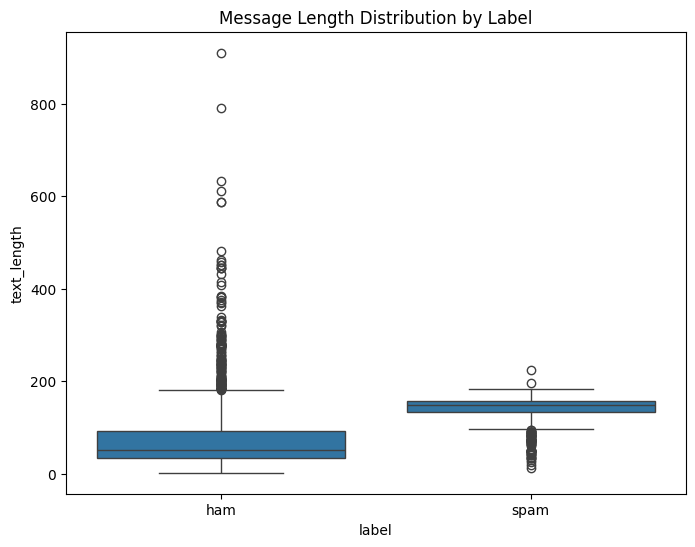


Most common special characters in spam messages: [('.', 1560), ('!', 542), (',', 405), ('/', 372), ('£', 324), ('-', 247), (':', 179), ('&', 178), ('?', 174), ("'", 127)]

Most common special characters in ham messages: [('.', 9488), ("'", 1744), (',', 1508), ('?', 1367), ('!', 839), (';', 762), ('&', 738), (':', 561), (')', 429), ('-', 327)]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate descriptive statistics for message length
df['text_length'] = df['text'].str.len()
print(df['text_length'].describe())

# Analyze word frequency
from collections import Counter

spam_words = ' '.join(df[df['label'] == 'spam']['text']).lower().split()
ham_words = ' '.join(df[df['label'] == 'ham']['text']).lower().split()

spam_word_counts = Counter(spam_words)
ham_word_counts = Counter(ham_words)

print("\nMost common spam words:", spam_word_counts.most_common(10))
print("\nMost common ham words:", ham_word_counts.most_common(10))

# Explore correlations between message length and label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Message Length Distribution by Label')
plt.show()


# Investigate special characters indicative of spam
import re
special_chars_spam = ' '.join(df[df['label'] == 'spam']['text']).lower()
special_chars_ham = ' '.join(df[df['label'] == 'ham']['text']).lower()

spam_special_char_counts = Counter(re.findall(r'[^\w\s]', special_chars_spam))
ham_special_char_counts = Counter(re.findall(r'[^\w\s]', special_chars_ham))

print("\nMost common special characters in spam messages:", spam_special_char_counts.most_common(10))
print("\nMost common special characters in ham messages:", ham_special_char_counts.most_common(10))

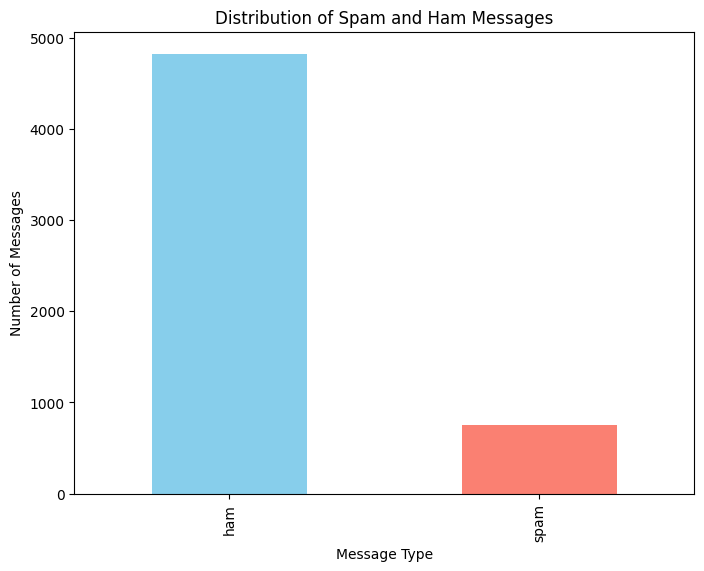

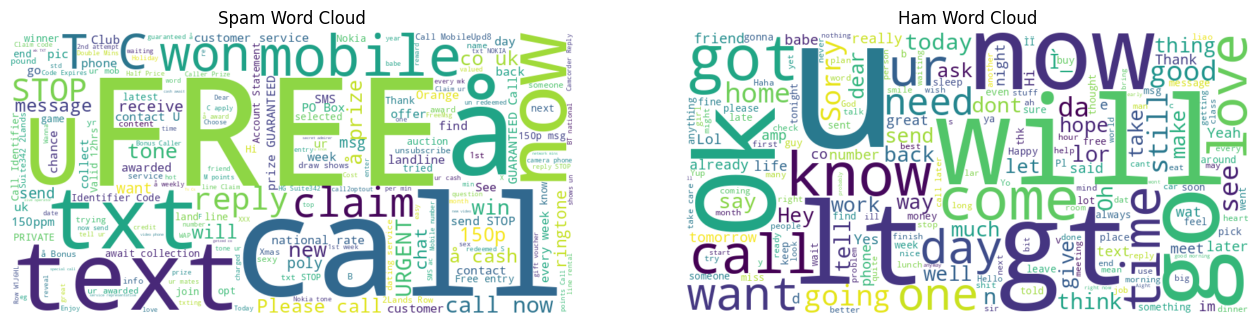

<ipython-input-5-5860f96e3285>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette={'spam':'red', 'ham':'green'})


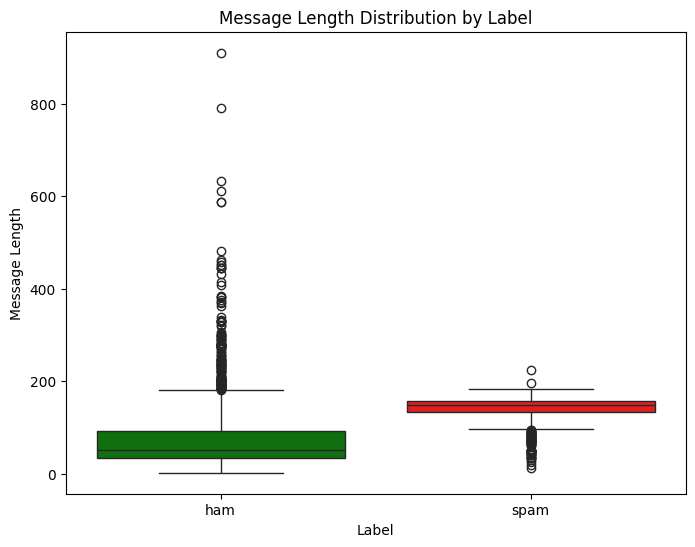

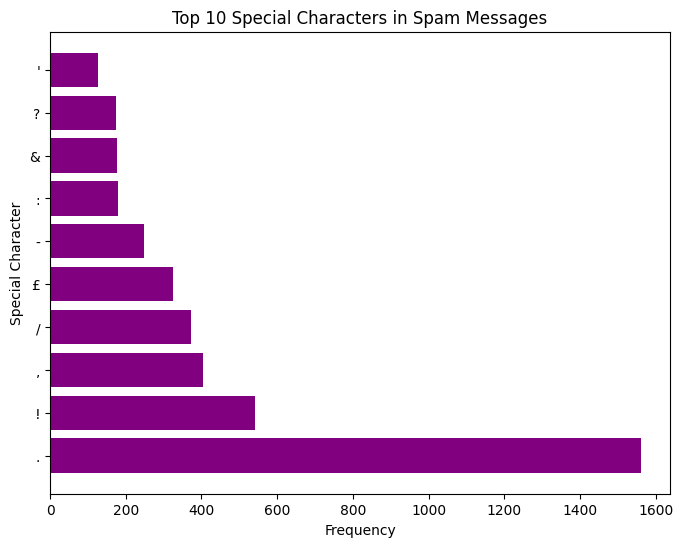

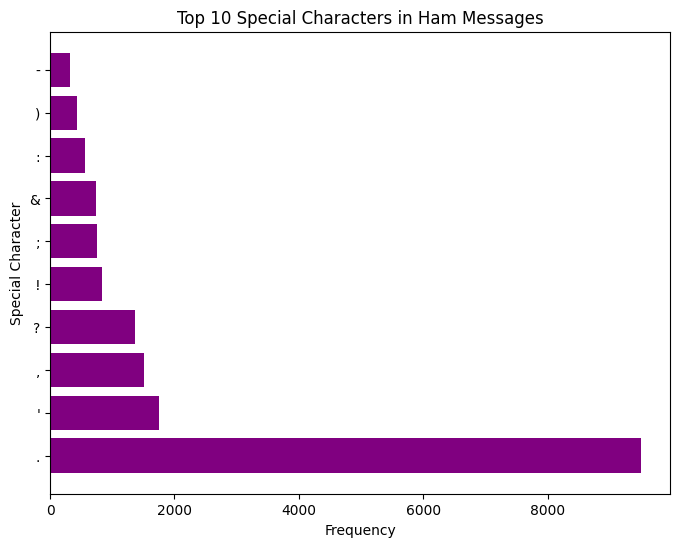

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# 1. Bar chart for label distribution
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Number of Messages')
plt.show()

# 2. Word clouds for spam and ham messages
spam_text = ' '.join(text for text in df[df['label'] == 'spam']['text'])
ham_text = ' '.join(text for text in df[df['label'] == 'ham']['text'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()

# 3. Boxplot of text length
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=df, palette={'spam':'red', 'ham':'green'})
plt.title('Message Length Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.show()

# 4. Horizontal bar charts for top special characters
import re
from collections import Counter

def plot_top_special_chars(text, title):
    special_chars = Counter(re.findall(r'[^\w\s]', text.lower()))
    top_10 = special_chars.most_common(10)
    chars, counts = zip(*top_10)
    plt.figure(figsize=(8,6))
    plt.barh(chars, counts, color='purple')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Special Character")
    plt.show()

spam_text_combined = ' '.join(df[df['label'] == 'spam']['text'])
ham_text_combined = ' '.join(df[df['label'] == 'ham']['text'])

plot_top_special_chars(spam_text_combined, "Top 10 Special Characters in Spam Messages")
plot_top_special_chars(ham_text_combined, "Top 10 Special Characters in Ham Messages")